# Lecture 4: Introduction to Python Classes via Linear Regression

April is the cruelest month, 2020

J. Portes

Aside: The following resource is a full textbook online with accompanying notebooks: https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

# Class-free Linear Regression (aka with functions only)

Linear Regression is a method used to define a relationship between a dependent variable $y$ and independent variable $x$. Which is simply written as:
$$ y = mx + b$$

where $m$ is the scale factor or slope, and $b$ is the bias or intercept

One approach is using **Ordinary Least Squares** (https://en.wikipedia.org/wiki/Ordinary_least_squares)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set() # this sets the plotting aesthetic for the notebook

In [10]:
x = np.arange(0,10,0.1)
m = 2.7
b = -5

We could implement this simply as:

In [11]:
y = m*x +b

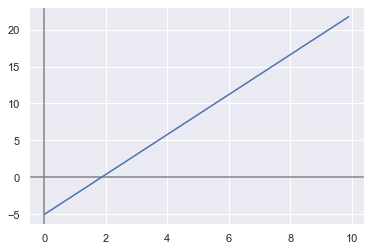

In [12]:
# these two functions plot vertical and horizontal lines
plt.axvline(x=0,ymin=-5,ymax=5,color='gray')
plt.axhline(y=0,xmin=-5,xmax=5,color='gray')

plt.plot(x,y)

plt.show()

We could also implement this as a simple function:

In [13]:
def linear_model(x,m,b):
    
    y = m*x + b
    
    return y

In [14]:
# add some noise
np.random.seed(0) # this sets the same noise every time you run the cell
x_data = x + np.random.randn(len(x))
y_data = linear_model(x_data,m,b) + np.random.randn(len(x))*5 # scaling the noise up

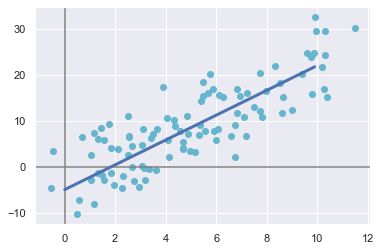

In [16]:
plt.axvline(x=0,ymin=-5,ymax=5,color='gray')
plt.axhline(y=0,xmin=-5,xmax=5,color='gray')


plt.scatter(x_data,y_data,color='C9')
plt.plot(x,y,linewidth=3)

plt.show()

Can we estimate the slope and intercept/bias from the noisy data?

We want to find a "model" with the values for $m$ and $b$ that minimizes the residuals between our model and the data points. We can define the residual $r$ for  each data point $i$ as:

$$ r_i = y_{i} - m \cdot x_i - b$$

and we want to minimize:

$$ \sum_{i=1}^{n \space samples} r_i^2$$

(note that $r_i$ is squared to account for positive and negative values)

We can derive the equations for the optimal $m$ and $b$: let's call these $m_{opt}$ and $b_{opt}$:

$$ m_{opt} = \frac{\sum_i (x_i-\bar{x})(y_i-\bar{y})}{\sum_i (x_i - \bar{x})^2}$$

$$ b_{opt} = \bar{y} - m_{opt} \cdot \bar{x} $$

See https://en.wikipedia.org/wiki/Simple_linear_regression for full derivation

In [22]:
# setting this again
x = np.arange(0,10,0.1)
m = 2.7
b = -5

rng = np.random.RandomState(0) # this is another way to set random state
x_data = x + rng.randn(len(x))
y_data = linear_model(x_data,m,b) + rng.randn(len(x))*5
x_data.size

100

In [23]:
x_mean = np.mean(x_data)
y_data_mean = np.mean(y_data)
    
n= len(y_data) # number of samples

Doing this in a `for` loop:

In [25]:
numerator=0
denomenator = 0
for i in range(n):
    
    numerator += (x_data[i]-x_mean)*(y_data[i]-y_data_mean)
    denomenator += (x_data[i]-x_mean)**2
    
m_opt = numerator/denomenator

b_opt = y_data_mean - m_opt * x_mean

print('m_opt = %.2f' % (m_opt))
print('b_opt = {:.2f}'.format(b_opt)) # note these are two ways of formatting the output to round to 2 decimal places (or 'floating points')

m_opt = 2.49
b_opt = -3.54


We can do the same thing without a `for` loop using arrays:

In [27]:
numerator = np.sum((x_data-x_mean)*(y_data-y_data_mean))
denomenator = np.sum((x_data-x_mean)**2)
    
m_opt = numerator/denomenator

b_opt = y_data_mean - m_opt * x_mean

print('m_opt = %.3f' % (m_opt))
print('b_opt = {:.3f}'.format(b_opt)) # note these are two ways of formatting the output to round to 2 decimal places (or 'floating points')

m_opt = 2.491
b_opt = -3.542


## PROBLEM: Code this as a function `fit()` with inputs `x_data`,`y_data` and outputs `m_opt`, `b_opt`

In [28]:
def fit(x_data, y_data, m_opt):
    x_mean = x_data.mean()
    y_data_mean = y_data.mean()
    
    numerator = np.sum((x_data-x_mean)*(y_data-y_data_mean))
    denomenator = np.sum((x_data-x_mean)**2)
    
    m_opt = numerator/denomenator
    
    b_opt = y_data_mean - m_opt * x_mean
    
    return(m_opt, b_opt)

# ...

One possible solution:

In [29]:
def fit(x_data,y_data):
    
    x_mean = x_data.mean()
    y_data_mean = y_data.mean()
    
    numerator = np.sum((x_data-x_mean)*(y_data-y_data_mean))
    denomenator = np.sum((x_data-x_mean)**2)
    
    m_opt = numerator/denomenator

    b_opt = y_data_mean - m_opt * x_mean
    
    return m_opt, b_opt

In [30]:
# Our fitting function
m_opt,b_opt = fit(x_data,y_data)
print('Best fit: m={:.3f}, b={:.3f}'.format(m_opt,b_opt)) #.3f mean up to 3 decimials

Best fit: m=2.491, b=-3.542


So we have constructed our own **Ordinary Least Squares** estimator!

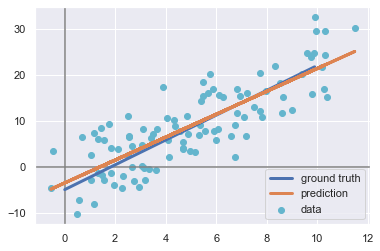

In [31]:
plt.axvline(x=0,ymin=-5,ymax=5,color='gray')
plt.axhline(y=0,xmin=-5,xmax=5,color='gray')

y_pred = linear_model(x_data,m_opt,b_opt)

plt.scatter(x_data,y_data,color='C9',label='data')
plt.plot(x,linear_model(x,m,b),linewidth=3,label='ground truth')
plt.plot(x_data,y_pred,'-',linewidth=3,label='prediction')

plt.legend()

plt.show()

Finally, we want to have some measure of goodness of fit. Let's use $R^2$ (the coefficient of determination):

$$ R^2 = 1 - \frac{\sum_i (y^{data}_i - y^{pred})^2}{\sum_i (y^{data}_i-\bar{y}^{data})^2}$$

In [32]:
ss_res = np.sum((y_data - y_pred)**2) # residual sum of squares
ss_tot = np.sum((y_data - y_data_mean)**2) # total sum of squares

r2 = 1-ss_res/ss_tot

print('r2 = {:.2f}'.format(r2))

r2 = 0.68


# Data science with Python: 6 ways to do linear regression

(borrowing heavily from https://www.freecodecamp.org/news/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b/)

## Method 1: `scipy.polyfit( )` or `numpy.polyfit( )`

For simple linear regression, one can choose degree 1.

In [33]:
z = np.polyfit(x_data, y_data, 1)
z


array([ 2.49089425, -3.54235546])

These are the same values we found above with our custom function!

## Method 2: `scipy.stats.linregress()`

In [34]:
from scipy import stats

This is a highly specialized linear regression function available within the `stats` module of `scipy` 
* It is fairly restricted in its flexibility as it is optimized to calculate a linear least-squares regression for two sets of measurements only. 
* You cannot fit a generalized linear model or multi-variate regression using this. 
* Because of its specialized nature, it is one of the fastest methods when it comes to simple linear regression. 

In [35]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)

print('--------------------------------------')
print('slope: ',slope,'\n')
print('intercept: ',intercept,'\n')
print('r-squared: ',r_value**2,'\n')
print('p-value: ',p_value,'\n')
print('standard error: ',std_err)
print('--------------------------------------')

--------------------------------------
slope:  2.4908942459878394 

intercept:  -3.5423554637163086 

r-squared:  0.6754591129106784 

p-value:  1.0978889281704885e-25 

standard error:  0.17441242816616506
--------------------------------------


# Method 3: `scipy.optimize.curvefit()`

In [36]:
from scipy import optimize

This is along the same line as the `polyfit` method, but more general in nature. This powerful function from `scipy.optimize` module can fit any user-defined function to a data set by doing least-square minimization.

* For simple linear regression, one can just write a linear mx+b function and call this estimator. 
* Works for multi-variate regression too. 
* It returns an array of function parameters for which the least-squares measure is minimized and the associated covariance matrix.

see full documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [37]:
popt, pcov = optimize.curve_fit(linear_model,x_data, y_data)

popt

array([ 2.49089425, -3.54235547])

# Method 4: `numpy.linalg.lstsq`

In [38]:
import numpy.linalg as LA

This is the fundamental method of calculating least-square solution to a linear system of equation by matrix factorization. It comes from the handy linear algebra module of numpy package. Under the hood, it solves the equation a x = b by computing a vector x that minimizes the Euclidean 2-norm || b — a x ||².

The equation may be under-, well-, or over- determined (i.e., the number of linearly independent rows of a can be less than, equal to, or greater than its number of linearly independent columns). If a is square and of full rank, then x (but for round-off error) is the “exact” solution of the equation.

You can do either simple or multi-variate regression with this and get back the calculated coefficients and residuals. One little trick is that before calling this function you have to append a column of 1’s to the x data to calculate the intercept term. Turns out it is one of the faster methods to try for linear regression problems.

(see https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq)

In [39]:
A = np.vstack([x_data, np.ones(len(x_data))]).T # append column of onese
A[:10,:] # see what matrix A looks like

array([[ 1.76405235,  1.        ],
       [ 0.50015721,  1.        ],
       [ 1.17873798,  1.        ],
       [ 2.5408932 ,  1.        ],
       [ 2.26755799,  1.        ],
       [-0.47727788,  1.        ],
       [ 1.55008842,  1.        ],
       [ 0.54864279,  1.        ],
       [ 0.69678115,  1.        ],
       [ 1.3105985 ,  1.        ]])

In [40]:
slope, intercept  = LA.lstsq(A, y_data)[0]

print(slope,intercept)

2.490894245987838 -3.542355463716304


C:\Users\jenni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


# Method 5: `statsmodels`

`statsmodels` is a great Python package that provides **classes** and **functions** for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure correctness.

For linear regression, one can use the OLS or **Ordinary Least Squares** function from this package and obtain the full blown statistical information about the estimation process.

One little trick to remember is that you have to add a constant manually to the x data for calculating the intercept, otherwise by default it will report the coefficient only. Below is the snapshot of the full results summary of the OLS model. It is as rich as any functional statistical language like R or Julia.

see https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

In [41]:
import statsmodels.api as sm
A = sm.add_constant(x_data) # Our model needs an intercept so we add a column of 1s
results = sm.OLS(y_data, A).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     204.0
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           1.10e-25
Time:                        23:03:57   Log-Likelihood:                -305.52
No. Observations:                 100   AIC:                             615.0
Df Residuals:                      98   BIC:                             620.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5424      1.016     -3.486      0.0

Quantities of interest can be extracted directly from the fitted model. Type `dir(results)` for a full list. Here are some examples:

In [42]:

print('Parameters: ', results.params) # notice the intercept is first, then the slope
print('R2: ', results.rsquared)

Parameters:  [-3.54235546  2.49089425]
R2:  0.675459112910678


`statsmodels` supports specifying models using R-style formulas and pandas `DataFrames`!

In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# let's make up two variables here x1 and x2 and put them all into a dataframe
dat = pd.DataFrame({'x1':x_data,'x2':x_data*1e-2,'y_data':y_data})
dat.head()

,x1,x2,y_data
0,1.764052,0.017641,9.178695
1,0.500157,0.005002,-10.388371
2,1.178738,0.011787,-8.169832
3,2.540893,0.025409,6.707395
4,2.267558,0.022676,-4.743210


In [44]:
model = smf.ols('y_data ~ x1+x2', data=dat)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_data   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     204.0
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           1.10e-25
Time:                        23:04:02   Log-Likelihood:                -305.52
No. Observations:                 100   AIC:                             615.0
Df Residuals:                      98   BIC:                             620.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5424      1.016     -3.486      0.0

# Method 6: SciKitLearn (`sklearn`)

This is the quintessential method used by majority of machine learning engineers and data scientists. Of course, for real world problem, it is probably never much used and is replaced by cross-validated and regularized algorithms such as **LASSO regression** or **ridge regression**. But the essential core of those advanced functions lies in this model.

Introductary examples can be found here: https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html (this resource is a full online textbook with accompanying notebooks)

The scikitlearn documentation is here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

(Ridge and LASSO regression reduce model complexity and prevent over-fitting. With ridge regression the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients aka L2 norm. With LASSO, the penalty is for the magnitude of the coeffecients aka L1 norm. This type of regularization (L1) can lead to sparse/zero coefficients)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression(fit_intercept=True)

model.fit(x_data.reshape(-1,1), y_data)

print("model slope:    ", model.coef_[0])
print("model intercept:", model.intercept_)

model slope:     2.490894245987837
model intercept: -3.542355463716298


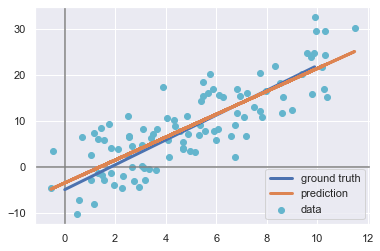

In [47]:
y_pred = model.predict(x_data.reshape(-1,1))


plt.axvline(color='gray')
plt.axhline(color='gray')

plt.scatter(x_data,y_data,color='C9',label='data')
plt.plot(x,linear_model(x,m,b),linewidth=3,label='ground truth')
plt.plot(x_data,y_pred,'-',linewidth=3,label='prediction')

plt.legend()
plt.show()

# What is special about these last two methods?

First we create a `LinearRegression` object:

In [48]:
model = LinearRegression(fit_intercept=True)

Then we apply a method `fit()` to it:

In [49]:
model.fit(x_data.reshape(-1,1), y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

And another method `predict()`

In [50]:
y_pred = model.predict(x_data.reshape(-1,1))

In addition, the 'object' we've called `model` stores values like `coef_` and `intercept_`

In [51]:
print("model slope:    ", model.coef_[0])
print("model intercept:", model.intercept_)

model slope:     2.490894245987837
model intercept: -3.542355463716298


# We've moved from functions to Classes!

# Why Classes?

Aren't we better off in a classless society? (see [Monty Python - Constitutional Peasants](https://www.youtube.com/watch?v=t2c-X8HiBng))

> Classless society, in Marxism, the ultimate condition of social organization, expected to occur when true communism is achieved. 

> According to Karl Marx (1818–83), the primary function of the state is to repress the lower classes of society in the interests of the ruling class. However, after the class struggle has resulted in the victory of the proletariat and the establishment of a socialist society, there will be no further need for such a repressive institution; with the disappearance of classes, the state is expected to “wither away.” (https://www.britannica.com/topic/classless-society)

> `Daved:` Basically classes help you take all the properties and behaviors of an object in your program, and combine them into a single interface, then re-use that interface wherever you need that type of object in your program.

> `twomers:`  Having functions and operators associated with a variable is very very handy. Saves you having to remember functions manipulate variables etc. I love them 

>`DougDbug:` For small programs, I wouldn't say object oriented programming is "easier". But for large complex projects, it's easier to design and maintain the program.

(from https://cboard.cprogramming.com/cplusplus-programming/87299-why-classes-useful.html)

# Why Object-Orient Programming?

**Object-oriented programming (OOP)** refers to a type of computer programming (software design) in which programmers define the **data type of a data structure**, and also the types of **operations (functions)** that can be applied to the data structure.

**In this way, the data structure becomes an object that includes both data and functions**

### Basic OOP Concepts:

* **Abstraction:** The process of picking out (abstracting) common features of objects and procedures.

* **Class:** A category of objects. The class defines all the common properties of the different objects that belong to it.

* **Information hiding:** The process of hiding details of an object or function. Information hiding is a powerful programming technique because it reduces complexity.

* **Inheritance:** a feature that represents the "is a" relationship between different classes.

* **Object:** a self-contained entity that consists of both data and procedures to manipulate the data.

* **Polymorphism:** A programming language's ability to process objects differently depending on their data type or class

(source https://www.webopedia.com/TERM/O/object_oriented_programming_OOP.html)

# Basic Example: Class

This was taken from the following resource: http://hplgit.github.io/primer.html/doc/pub/class/._class-readable001.html#sec:class:functors

* A class contains a set of variables (data) and a set of functions, or methods, held together as one unit.

* The variables are visible in all the functions in the class. That is, we can view the variables as "global" in these functions. However these variables are not accessible separate from the class (this type of **information hiding** is powerful)

* You can also make many copies of a class

* Every class must have a name, often starting with a capital by convention a class usually has another function, called constructor for initializing the data
* The constructor is always named __init__.


In [52]:
# This is just a function
def linear_model(x,m,b):
    
    y = m*x + b
    
    return y

In [53]:
# This is a class!!
class LinearModel():
    
    def __init__(self,m,b):
        self.m = m
        self.b = b

In [54]:
lm = LinearModel()

TypeError: __init__() missing 2 required positional arguments: 'm' and 'b'

In [55]:
lm = LinearModel(m=2,b=5)

In [56]:
lm

`lm` is an **Object** that is part of the `LinearModel` **Class**

In [57]:
m # this is the m defined in the notebok above

2.7

In [58]:
lm.m # this is the m assigned to this specific object instance


2

In [59]:
lm.b

5

Let's define another method:

In [51]:
class LinearModel():
    
    def __init__(self,m,b):
        self.m = m
        self.b = b
        
    def output(self,x):
        
        y = self.m*x + self.b
        
        return y

An **object** of a user-defined class (like `lm`) is usually called an **instance.**

We need such an instance in order to use the data in the class and call the value function.

In [52]:
lm = LinearModel(m=2,b=5)

It looks like we call the class `LinearModel` as if it were a function. However, `LinearModel(m=2,b=5)` is automatically translated by Python to a call to the constructor `__init__` in class `LinearModel`. 

The arguments in the call, here `m=2,b=5`, are always passed on as arguments to `__init__` after the `self` argument. That is, `m` gets the value 2, `b` the value 5, and `self` is just dropped in the call.

In [54]:
lm.output(np.arange(0,1,0.1))

array([5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8])

We have already introduced the term **"instance''** for the object of a class. 

Functions in classes are commonly called **methods**, and **variables** (data) in classes are called **data attributes**. 

Methods are also known as **method attributes**. 

In our sample class `LinearModel` we have two methods or method attributes, `__init__` and `output`, two data attributes, `m` and `b`, and four attributes in total (`__init__`, `output`,`m` and `b`). 

The names of attributes can be chosen freely, just as names of ordinary Python functions and variables. However, the constructor must have the name `__init__`, otherwise it is not automatically called when we create new instances.

You can do whatever you want in whatever method, but it is a common convention to use the constructor for initializing the variables in the class.



## PROBLEM: Write another method here called `print_equation` that prints the equation $y=mx+b$ with the values of $m$ and $b$

In [57]:
class LinearModel():
    
    def __init__(self,m,b):
        self.m = m
        self.b = b
        
    def output(self,x):
        
        y = self.m*x + self.b
        
        return y
    
    # write another method here called `print_equation` that prints the equation y=mx+b with the values of m and b
    def print_equation(self):
        print('y = {}x + {}'.format(self.m,self.b))

In [58]:
#Test your method here
lm = LinearModel(m=2,b=5)
lm.print_equation()

y = 2x + 5


# ...

In [59]:
class LinearModel():
    
    def __init__(self,m,b):
        self.m = m
        self.b = b
        
    def output(self,x):
        
        y = self.m*x + self.b
        
        return y
    
    def print_equation(self):
        
        print('y = {}x + {}'.format(self.m,self.b))

In [60]:
lm = LinearModel(m=2,b=5)
lm.print_equation()

y = 2x + 5


Does this class work for 2D arrays?

In [61]:
lm = LinearModel(m=2*np.ones((2)),b=np.ones(2)*5)

In [62]:
lm.output(np.arange(0,1,0.1))

ValueError: operands could not be broadcast together with shapes (2,) (10,) 

## PROBLEM: How might we create a class `LinearModelND` that works for N-dimensional data?

We could create a class from scratch

Alternatively, would could create a class that **inherits** from `LinearModel`

In [63]:
class LinearModelND(LinearModel): # this is inheriting all data/method attributes from LinearModel
    pass

In [64]:
lm_nd = LinearModelND(m=20,b=55)

This has all the same data/variables and methods as the `LinearModel` class

In [65]:
lm_nd.print_equation()

y = 20x + 55


## PROBLEM: Create a class `LinearModelND` that works for N-dimensional data using **inheritance**. Redefine the method `output` and nothing else (HINT: you have to use the dot product `@` instead of the element-wise product `*`)

# ...

In [66]:
class LinearModelND(LinearModel):

    def output(self,X):
        # by convention X is a matrix and m is a vector
        # @ is the dot product
        y = X @ self.m + self.b # this does matrix multiplication
        
        return y

In [69]:
lm_nd = LinearModelND(m=20*np.ones((2)),b=np.ones(10)*55)

In [70]:
# fake 2D data
xx = np.linspace(10,50,10) + np.random.randn(10)
xx = np.vstack((xx,xx-10)).T # stack and then transpose ... this is just for illustration
xx.shape

(10, 2)

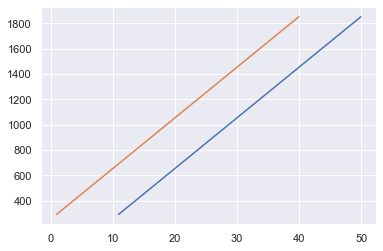

In [71]:
yy = lm_nd.output(xx)

plt.plot(xx,yy)
plt.show()

This creates a new `__init__` constructor method for `LinearModelND` but inherits the other methods:

In [72]:
class LinearModelND(LinearModel):

    def __init__(self, m,b,dim):
        self.m = m
        self.b = b
        self.dim = dim

The `super()` function makes the 'child' class inherit all the methods and properties from its 'parent' (e.g. `LinearModel`)

* It makes class inheritance more manageable and extensible

* More importantly, it allows for multiple inheritances!

In [73]:
class LinearModelND(LinearModel):

    def __init__(self, m,b,dim):
        super().__init__(m, b) # gets init from passed model LinearModel
        self.dim = dim # this adds another variable to the intialization


# The id, ego, and super-ego: Rules regarding `self`.
* Any class method must have `self` as first argument.
* `self` represents an (arbitrary) instance of the class.
* To access any class attribute inside class methods, we must prefix with `self`, as in `self.name`, where name is the `name` of the attribute.
* `self` is dropped as argument in calls to class methods.

# Break!

(highly recommended Monty Python --> Constitutional Peasants Scene https://www.youtube.com/watch?v=t2c-X8HiBng)

# Building a Linear Regression Class from Scratch

(This is inspired by the following post: https://towardsdatascience.com/linear-regression-from-scratch-with-numpy-implementation-finally-8e617d8e274c)

We want our linear regression class to look something like this

In [74]:
# this cell won't run properly

class LinearRegression():
    
    def __init__(self):
        
    def fit(self):
        
    def score(self):
        
    def predict(self):
        
    def get_params(self):

IndentationError: expected an indented block (<ipython-input-74-6f417e876ea7>, line 7)

There are a few things to notice here:

In [75]:
class LinearRegression():
    
    def __init__(self,fit_intercept=True):
        self.fit_intercept = True

Let's now add the method `fit` that fits the optimal $m$ and $b$ values:

In [76]:
class LinearRegression():
    
    def __init__(self,fit_intercept=True):
        self.fit_intercept = fit_intercept
        
    def fit(self,x,y_data):
        
        x_mean = np.mean(x)
        y_data_mean = np.mean(y_data)
        
        numerator = np.sum((x-x_mean)*(y_data-y_data_mean))
        denomenator = np.sum((x-x_mean)**2)
    
        m_opt = numerator/denomenator
        self.m = m_opt

        if self.fit_intercept: # notice this boolean clause
            b_opt = y_data_mean - m_opt * x_mean
            self.b = b_opt

Next, let's add a method `predict()` that predicts $y$ based on the optimally estimated $m$ and $b$

In [77]:
class LinearRegression():
    
    def __init__(self,fit_intercept=True):
        self.fit_intercept = fit_intercept
        
    def fit(self,x,y_data):
        
        x_mean = np.mean(x)
        y_data_mean = np.mean(y_data)
        
        numerator = np.sum((x-x_mean)*(y_data-y_data_mean))
        denomenator = np.sum((x-x_mean)**2)
    
        m_opt = numerator/denomenator
        self.m = m_opt

        if self.fit_intercept:
            b_opt = y_data_mean - m_opt * x_mean
            self.b = b_opt
            
    def predict(self,x):
        
        if self.fit_intercept:
            y_pred = self.m*x + self.b
        else:
            y_pred = self.m*x
        return y_pred

Let's test our class!

In [79]:
# generate the data again
x = np.arange(0,10,0.1)
m = 2.7
b = -5
np.random.seed(0)
y = m*x + b # we assume we know the ground truth here
x_data = x + np.random.randn(len(x))
y_data = m*x_data + b + np.random.randn(len(x))*5


# create instance of class
model = LinearRegression() # fitintercept was defaulted to True in class

# call method to class object
model.fit(x_data,y_data)

# call another method on instance/object
y_pred = model.predict(x_data)

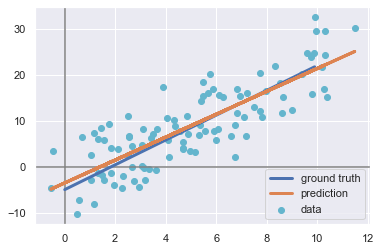

In [80]:
plt.axvline(color='gray')
plt.axhline(color='gray')

plt.scatter(x_data,y_data,color='C9',label='data')
plt.plot(x,y,'-',linewidth=3,label='ground truth')
plt.plot(x_data,y_pred,'-',linewidth=3,label='prediction')

plt.legend()
plt.show()

We can have an internal method `__linear_model` that outputs the prediction equation. This is meant to illustrate the convention that methods with `__` are only used inside the class definition

In [82]:
class LinearRegression():
    
    def __init__(self,fit_intercept=True):
        self.fit_intercept = fit_intercept
        
    def fit(self,x,y_data):
        
        x_mean = np.mean(x)
        y_data_mean = np.mean(y_data)
        
        numerator = np.sum((x-x_mean)*(y_data-y_data_mean))
        denomenator = np.sum((x-x_mean)**2)
    
        m_opt = numerator/denomenator
        self.m = m_opt

        if self.fit_intercept:
            b_opt = y_data_mean - m_opt * x_mean
            self.b = b_opt
            
    def predict(self,x):
        
        return __linear_model(x)
    
    def __linear_model(self,x,m,b=0):
        if self.fit_intercept:
            y_pred = self.m*x + self.b
        else:
            y_pred = self.m*x
        return y_pred

Finally, let's add a `score` method that returns the $R^2$ value

In [84]:
class LinearRegression():
    
    def __init__(self,fit_intercept=True):
        self.fit_intercept = fit_intercept
            
    def score(self,x,y):
        ss_res = np.sum((y - self.predict(x))**2) # residual sum of squares
        ss_tot = np.sum((y - np.mean(y))**2) # total sum of squares
        r2 = 1-ss_res/ss_tot
        
        return r2
    
    def fit(self,x,y_data):
        x_mean = np.mean(x)
        y_data_mean = np.mean(y_data)
        numerator = np.sum((x-x_mean)*(y_data-y_data_mean))
        denomenator = np.sum((x-x_mean)**2)
        m_opt = numerator/denomenator
        self.m = m_opt

        if self.fit_intercept:
            b_opt = y_data_mean - m_opt * x_mean
            self.b = b_opt
            
    def predict(self,x):
        return self.__linear_model(x)
    
    def __linear_model(self,x):
        if self.fit_intercept:
            y_pred = self.m*x + self.b
        else:
            y_pred = self.m*x
        return y_pred

Let's compare the quality of fit with and without the intercept $b$

In [85]:
# create instance of class
model1 = LinearRegression(fit_intercept=True)
model1.fit(x_data,y_data)
r2_1 = model1.score(x,y_data)

model2 = LinearRegression(fit_intercept=False)
model2.fit(x_data,y_data)
r2_2 = model2.score(x,y_data)

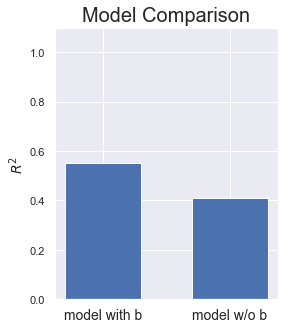

In [109]:
fig,ax =plt.subplots(1,1,figsize=(4,5))

ax.bar([0,1],[r2_1,r2_2],width=0.6)
ax.set_ylim(0,1.1)
ax.set_xticks([0,1])
ax.set_xticklabels(['model with b','model w/o b'],fontsize=14)
ax.set_title('Model Comparison',fontsize=20)
ax.set_ylabel(r'$R^2$ ',fontsize=14)
plt.show()

Finally, let's make a simple method `get_params` that returns the fit parameters $m$ and $b$:

In [90]:
class LinearRegression():
    
    def __init__(self,fit_intercept=True):
        self.fit_intercept = fit_intercept
        
    def get_params(self):
        
        self.params = {}
        self.params['m']=self.m
        if self.fit_intercept:
            self.params['b'] = self.b
            
        return self.params
        
    def fit(self,x,y_data):
        
        x_mean = np.mean(x)
        y_data_mean = np.mean(y_data)
        
        numerator = np.sum((x-x_mean)*(y_data-y_data_mean))
        denomenator = np.sum((x-x_mean)**2)
    
        m_opt = numerator/denomenator
        self.m = m_opt

        if self.fit_intercept:
            b_opt = y_data_mean - m_opt * x_mean
            self.b = b_opt
            
    def predict(self,x):
        
        return self.__linear_model(x)
    
    def __linear_model(self,x):
        if self.fit_intercept:
            y_pred = self.m*x + self.b
        else:
            y_pred = self.m*x
        return y_pred

    def score(self,x,y):
        ss_res = np.sum((y - self.predict(x))**2) # residual sum of squares
        ss_tot = np.sum((y - np.mean(y))**2) # total sum of squares

        r2 = 1-ss_res/ss_tot
        
        return r2
    
    

In [91]:
model = LinearRegression(fit_intercept=True)
model.fit(x_data,y_data)

In [92]:
# this is one way to extract the parameters
model.m

2.490894245987839

In [93]:
# this is another way with our new method
params = model.get_params()
print('------\nparams \n------\n',params)

------
params 
------
 {'m': 2.490894245987839, 'b': -3.542355463716307}


# PROBLEM: Document this class with conventional syntax/formatting

In [95]:
class LinearRegression():
    """ 
    Ordinary Least Squares Regression
    
    
    Parameters
    ----------
    
    fit_intercept: : bool, optional, default True
        Whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (i.e. data is expected to be centered).
        
    Attributes
    ----------
    m : scalar
        Estimated slope for the linear regression problem.
    
    b : ?
        ????????
        
    params : ?
        ????????
        
    See Also
    --------
    sklearn.linear_model.Ridge : Ridge regression addresses some of the
        problems of Ordinary Least Squares by imposing a penalty on the
        size of the coefficients with l2 regularization.
    sklearn.linear_model.Lasso : The Lasso is a linear model that estimates
        sparse coefficients with l1 regularization.
    sklearn.linear_model.ElasticNet : Elastic-Net is a linear regression
        model trained with both l1 and l2 -norm regularization of the
        coefficients.
        
    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.linear_model import LinearRegression
    >>> X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
    >>> # y = 1 * x_0 + 2 * x_1 + 3
    >>> y = np.dot(X, np.array([1, 2])) + 3
    >>> reg = LinearRegression().fit(X, y)
    >>> reg.score(X, y)
    1.0
    
    """
    
    def __init__(self,fit_intercept=True):
        self.fit_intercept = fit_intercept
    
        
    def fit(self,x,y_data):
        
         """
        Fit linear model.
        Parameters
        ----------
        x : {array-like, sparse matrix} of shape (n_samples, n_features)
            Training data
        y : array-like of shape (n_samples,) or (n_samples, n_targets)
            Target values. Will be cast to X's dtype if necessary

        Returns
        -------
        self : returns an instance of self.
        """
        
        x_mean = np.mean(x)
        y_data_mean = np.mean(y_data)
        
        numerator = np.sum((x-x_mean)*(y_data-y_data_mean))
        denomenator = np.sum((x-x_mean)**2)
    
        m_opt = numerator/denomenator
        self.m = m_opt

        if self.fit_intercept:
            b_opt = y_data_mean - m_opt * x_mean
            self.b = b_opt
            
    def predict(self,x):
        """ ?? """
        
        return self.__linear_model(x)
    
    def __linear_model(self,x):
        if self.fit_intercept:
            y_pred = self.m*x + self.b
        else:
            y_pred = self.m*x
        return y_pred

    def score(self,x,y):
        """ ?? """
        ss_res = np.sum((y - self.predict(x))**2) # residual sum of squares
        ss_tot = np.sum((y - np.mean(y))**2) # total sum of squares

        r2 = 1-ss_res/ss_tot
        
        return r2
    
    def get_params(self):
        """ ?? """
        
        self.params = {}
        self.params['m']=self.m
        if self.fit_intercept:
            self.params['b'] = self.b
            
        return self.params
    

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 69)

More on building custom sklearn estimators:
    
    * https://towardsdatascience.com/building-a-custom-model-in-scikit-learn-b0da965a1299
        
    * https://scikit-learn.org/stable/developers/develop.html
    

# Thanks!

April is the cruellest month, breeding

Lilacs out of the dead land, mixing

Memory and desire, stirring

Dull roots with spring rain. 

~ T.S. Eliot, "The Wasteland"